In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# System
import os
import sys

# Maths
import numpy as np

# ML
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Utilities
import h5py
from tqdm.auto import tqdm
import project_utils as utils
from tempfile import mkdtemp
from shutil import rmtree
from tools import load_json, save_json

# Initial setup

In [22]:
# Load train set (same as ridge)
train_idxs = np.loadtxt('../Processed_Data/DEEM_330k/ridge_train.idxs', dtype=int)

# Linear PCA: IZA LIDs on Deem 10k LIDs

In [23]:
# Load Deem LIDs
deem_lids = np.loadtxt('../Raw_Data/GULP/LIDs/LID_Deem.out', usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9))
deem_lid_labels = np.loadtxt('../Raw_Data/GULP/LIDs/LID_Deem.out', usecols=0, dtype=str)
deem_lid_sort_idxs = np.argsort(deem_lid_labels)
deem_lids = deem_lids[deem_lid_sort_idxs]

In [24]:
# Load IZA LIDs
iza_lids = np.loadtxt('../Raw_Data/GULP/LIDs/LID_IZA.out', usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9))
iza_lid_labels = np.loadtxt('../Raw_Data/GULP/LIDs/LID_IZA.out', usecols=0, dtype=str)
iza_lid_sort_idxs = np.argsort(iza_lid_labels)
iza_lids = iza_lids[iza_lid_sort_idxs]

In [25]:
# Load IZA cantons
cantons_iza = np.loadtxt('../Raw_Data/IZA_230/cantons_compositions.dat', usecols=1, dtype=int)
n_iza = len(cantons_iza)

In [26]:
deem_name = 'DEEM_330k'
iza_name = 'IZA_230'
deem_dir = f'../Processed_Data/{deem_name}/Data'
iza_dir = f'../Processed_Data/{iza_name}/Data'

In [27]:
n_components = 2

In [28]:
# Set PCA parameters
pca_parameters = dict(n_components=n_components)

# Set data directory
output_dir = 'LPCA'
model_dir = f'../Processed_Data/Models/Classical/{output_dir}'

# Prepare output files and directories
os.makedirs(model_dir, exist_ok=True)
os.makedirs(f'{deem_dir}/Classical/{output_dir}', exist_ok=True)   
os.makedirs(f'{iza_dir}/Classical/{output_dir}', exist_ok=True)

# Prepare batches for PCA on the 330k
# n_samples_330k = deem_330k.len()
# n_batches = n_samples_330k // batch_size
# if n_samples_330k % batch_size > 0:
#     n_batches += 1

# Initialize PCA for structures
pipeline = Pipeline(
    [
        ('norm_scaler', utils.StandardNormScaler(featurewise=True)), 
        ('pca', PCA(**pca_parameters))
    ],
)
# pipeline.fit(deem_lids[train_idxs, :])
pipeline.fit(deem_lids)

# Compute IZA PCA projections
T_iza = pipeline.transform(iza_lids)

# Transform the data and save
# Prepare output arrays for batch processing
T_deem_330k = pipeline.transform(deem_lids)

# Read the DEEM_330k structures and compute decision functions
# and canton predictions in batches
# for i in tqdm(range(0, n_batches), desc='Batch', leave=False):
#     batch_slice = slice(i * batch_size, (i + 1) * batch_size)
#     deem_330k_batch = deem_330k[batch_slice, :]
#     T_deem_330k[batch_slice] = pipeline.transform(deem_330k_batch)

# utils.save_hdf5(f'{iza_dir}/Classical/{output_dir}/pca_structures.hdf5', T_iza)
# utils.save_hdf5(f'{deem_dir}/Classical/{output_dir}/pca_structures.hdf5', T_deem_330k)

# # Save the PCA model
# save_json(pipeline.named_steps['norm_scaler'].__dict__, f'{model_dir}/norm_scaler.json', array_convert=True)
# save_json(pipeline.named_steps['pca'].__dict__, f'{model_dir}/pca.json', array_convert=True)

In [10]:
import matplotlib.pyplot as plt

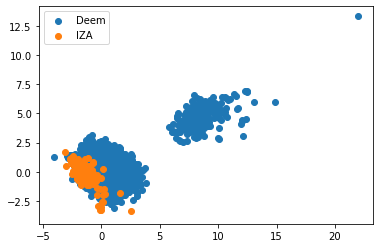

In [29]:
plt.scatter(T_deem_330k[:, 0], T_deem_330k[:, 1], label='Deem')
plt.scatter(T_iza[:, 0], T_iza[:, 1], label='IZA')
plt.legend()
plt.show()

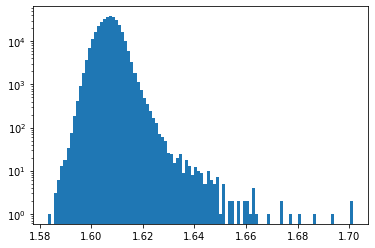

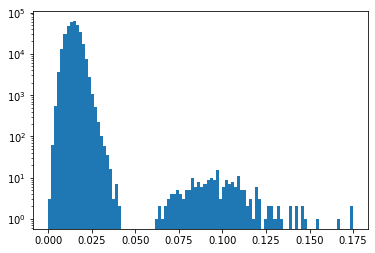

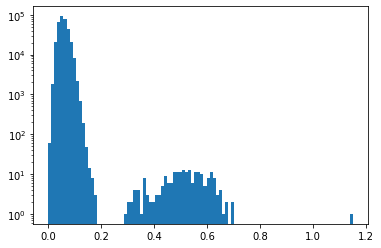

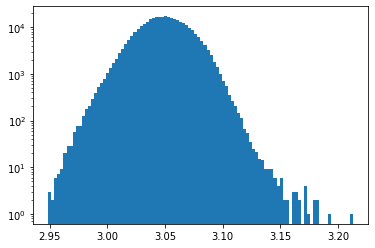

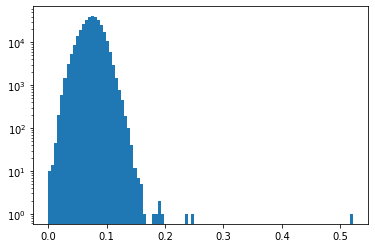

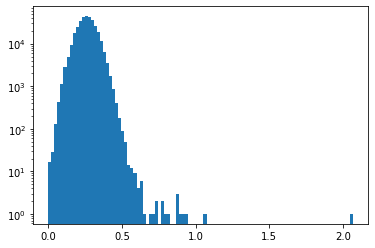

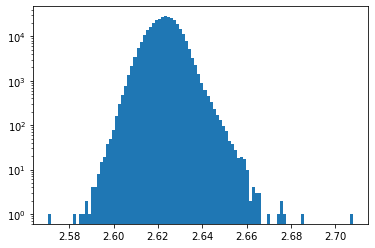

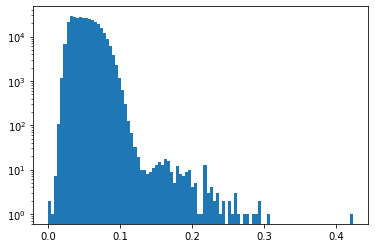

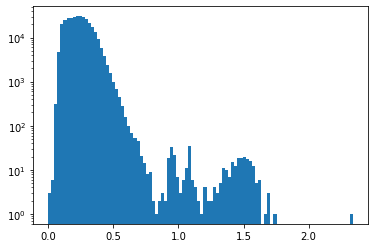

In [20]:
for i in range(0, 9):
    plt.hist(deem_lids[:, i], bins=100, log=True)
#     plt.hist(iza_lids[:, i], bins=10, log=True)
    plt.show()

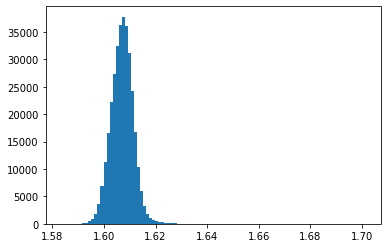

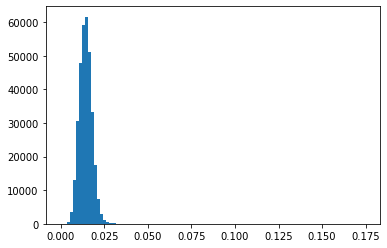

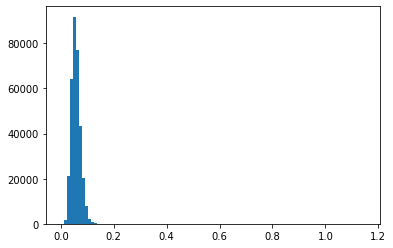

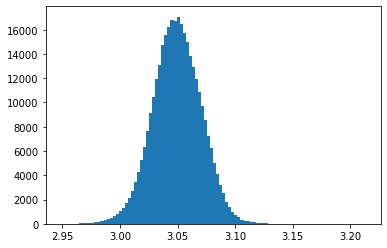

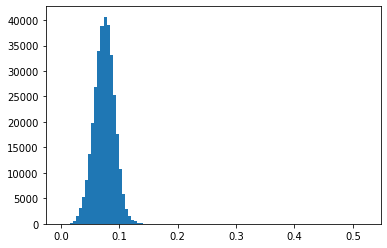

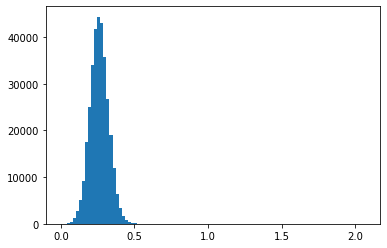

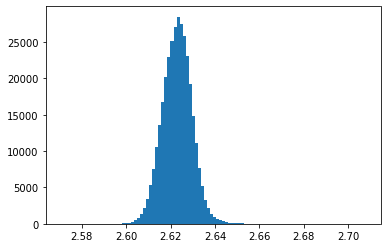

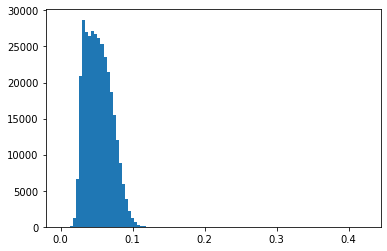

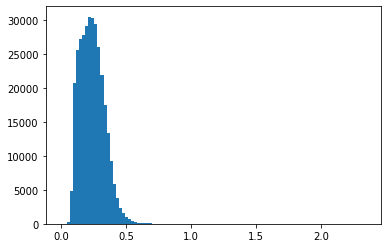

In [21]:
for i in range(0, 9):
    plt.hist(deem_lids[:, i], bins=100, log=False)
#     plt.hist(iza_lids[:, i], bins=10, log=False)
    plt.show()